Логистическая регрессия часто применяется для задач классификации, в которых предсказывается, относится ли конкретный пример данных к конкретной категории (классу). Эта постановка отличается от задач регрессии, в которых по заданному примеру данных необходимо предсказать числовое значение, относящееся к непрерывному диапазону. Пример задачи классификации: разбиение пользователей Twitter на мужчин и женщин по заданным различным входным признакам, например частоте отправки ими твитов или количеству ответов на твиты. Модель логистической регрессии относится к наиболее основополагающим моделям машинного обучения. Многие из понятий, с которыми вы познакомитесь в этом разделе, станут основой для более продвинутых методик машинного обучения.

Чтобы познакомиться с логистической регрессией, кратко рассмотрим, как работает линейная регрессия: по входным данным вычисляется прямая, лучше всего подходящая для этих обучающих данных, и предсказывается выходной сигнал для входного сигнала x. В целом линейная регрессия прекрасно подходит для предсказания непрерывного выходного сигнала, величина которого может принимать бесконечное количество значений. Предсказанные ранее курсы акций, например, могут теоретически принимать любые положительные значения.
Но что, если выходной сигнал не непрерывный, а категориальный, то есть принадлежит к ограниченному количеству групп или категорий? Например, пусть мы хотим предсказать правдоподобие рака легких, исходя из количества выкуренных пациентом сигарет. У каждого пациента либо есть рак легких, либо нет. В отличие от курсов акций, возможных исходов только два. Предсказание правдоподобия категориальных исходов — основная причина использования логистической регрессии.

Логистическую регрессию можно применять и для полиномиальной классификации (multinomial classification), при которой данные классифицируются более чем по двум классам. Для этого используется обобщение сигма-функции — так называемая многомерная логистическая функция (softmax function), возвращающая кортеж вероятностей, по одной для каждого класса. Сигма-функция же преобразует входной (-ые) признак (-и) в одно значение вероятности. Впрочем, ради простоты и удобочитаемости здесь я сосредоточу свое внимание на биномиальной классификации (binomial classification).

Мы продемонстрируем пример использования логистической регрессии в сфере здравоохранения (корреляция потребления сигарет с вероятностью рака). Подобное приложение — «виртуальный доктор» — прекрасная идея для мобильного приложения, правда? Создадим ваше первое приложение — «виртуальный доктор» на основе логистической регрессии, с помощью одной строки кода Python!

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#данные 

X = np.array([[0, "No"],
            [10, "No"],
            [10, "Yes"],
            [60, "Yes"],
            [90, "Yes"],
            [35, "Yes"],
            [20, "Yes"],
            [20, "No"],
            [20, "Yes"],
            [20, "Yes"]])
n = len(X)
#logic 

model = LogisticRegression().fit(X[:,0].reshape(n, 1), X[:,1])
pr_md = model.predict([[2], [12], [13], [40], [90]])
print(pr_md)

['No' 'No' 'Yes' 'Yes' 'Yes']


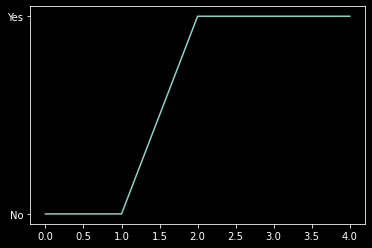

In [11]:
import matplotlib.pyplot as plt
plt.plot(pr_md)
plt.show()

Принцип работы
Обучающие данные X состоят из четырех медицинских карт (строк), включающих два столбца. В первом столбце содержится количество выкуриваемых пациентами сигарет (входной признак), а во втором — метки классов (class labels), отражающие, был ли у них в итоге диагностирован рак легких.
Мы создали модель с помощью вызова конструктора LogisticRegression(), а затем вызвали для этой модели функцию fit(); она принимает два аргумента — входной сигнал (количество выкуриваемых сигарет) и выходные метки классов (рак). Функция fit() ожидает на входе двумерный массив данных, по одной строке на каждый обучающий пример данных и по одному столбцу для каждого признака этого обучающего примера данных. В данном случае у нас только одно значение признака, так что мы преобразуем одномерный входной сигнал в двумерный массив NumPy с помощью операции reshape(). Первый аргумент функции reshape() задает количество строк, а второй — количество столбцов. Нам важно только количество столбцов, равное 1. В качестве желаемого количества строк мы передаем -1, указывая тем самым NumPy определить количество строк автоматически.
Входные обучающие данные после изменения формы будут выглядеть следующим образом (фактически мы просто удалили метки классов, сохранив форму двумерного массива неизменной):
[[0],
[10],
[60],
[90]]
Далее мы предсказываем, есть ли у пациента рак легких по выкуриваемому количеству сигарет: входные данные включают значения 2, 12, 13, 40 и 90 сигарет. На выходе получаем следующее:
['No' 'No' 'No' 'Yes' 'Yes']
Модель предсказывает, что первые три пациента — онконегативны, а последние два — онкопозитивны.
136 Глава 4. Машинное обучение
Посмотрим подробнее на возвращаемые сигма-функцией вероятности, которые привели к такому предсказанию!

In [ ]:
for i in range(20):
    print("x=" + str(i) + " --> " + str(model.predict_proba([[i]])))

x=0 --> [[9.99912445e-01 8.75549634e-05]]
x=1 --> [[9.99828776e-01 1.71223913e-04]]
x=2 --> [[9.99665178e-01 3.34821500e-04]]
x=3 --> [[9.99345372e-01 6.54627684e-04]]
x=4 --> [[0.99872049 0.00127951]]
x=5 --> [[0.99750062 0.00249938]]
x=6 --> [[0.99512342 0.00487658]]
x=7 --> [[0.99050672 0.00949328]]
x=8 --> [[0.98160019 0.01839981]]
x=9 --> [[0.96463594 0.03536406]]
x=10 --> [[0.93309702 0.06690298]]
x=11 --> [[0.8770166 0.1229834]]
x=12 --> [[0.78477068 0.21522932]]
x=13 --> [[0.65087747 0.34912253]]
x=14 --> [[0.48802963 0.51197037]]
x=15 --> [[0.32768379 0.67231621]]
x=16 --> [[0.19949258 0.80050742]]
x=17 --> [[0.11301998 0.88698002]]
x=18 --> [[0.06116602 0.93883398]]
x=19 --> [[0.03223814 0.96776186]]


Резюмируя: вы научились легко решать задачи классификации с помощью логистической регрессии с использованием библиотеки scikit-learn. Основная идея логистической регрессии заключается в подгонке к данным S-образной кривой (сигма-функции). Эта функция ставит каждой точке данных и каждому возможному классу в соответствие числовое значение от 0 до 1, которое моделирует вероятность принадлежности этой точки данных заданному классу. Однако на практике часто попадаются обучающие данные без меток классов. Например, у вас могут быть данные о покупателях (допустим, их возраст и уровень дохода), но никаких меток классов для точек данных. Чтобы извлечь полезную информацию из подобных данных, понадобится еще одна разновидность машинного обучения: машинное обучение без учителя. А точнее, мы научимся искать кластеры схожих точек данных — это важное подмножество машинного обучения без учителя.